In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [2]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

#### Logistic regression hypothesis
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [3]:
data = loaddata("ex2data1.txt", ",")

Dimensions:  (100, 3)
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [4]:
X = np.c_[np.ones((data.shape[0])),data[:,:2]]
y = np.c_[data[:,2:]]

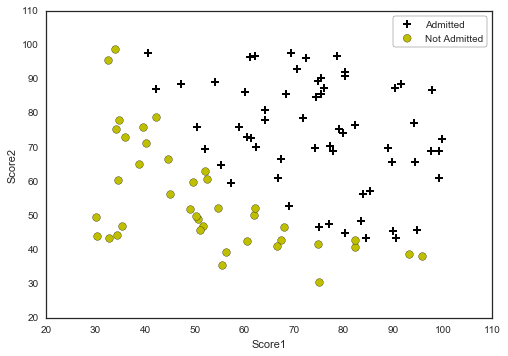

In [5]:
neg = data[:,2]==0
pos = data[:,2]==1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);

In [6]:
import scipy

In [7]:
scipy.special.expit

<ufunc 'expit'>

#### Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [8]:
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

In [99]:
def costFunction(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta))
#     Instead use sigmoid function defined above
    J = (-1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))
    if np.isnan(J[0]):
        return np.inf
    return J[0]

In [100]:
costFunction(initial_theta, X, y)

0.69314718055994529

In [95]:
def gradient(theta, X, y):
    m = y.size
    h = scipy.special.expit(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

In [96]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

Cost: 
 0.69314718056
Grad: 
 [  1.87880932e-02   7.77711864e-05]


In [97]:
initial_theta = np.zeros(X.shape[1])
initial_theta

array([ 0.,  0.])

In [98]:
initial_theta.reshape(-1,1)

array([[ 0.],
       [ 0.]])

In [15]:
optimizeCF = minimize(costFunction,initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})
optimizeCF

      fun: 0.2034977015894407
 hess_inv: array([[  3.24739469e+03,  -2.59380769e+01,  -2.63469561e+01],
       [ -2.59380769e+01,   2.21449124e-01,   1.97772068e-01],
       [ -2.63469561e+01,   1.97772068e-01,   2.29018831e-01]])
      jac: array([ -2.73305338e-10,   1.43144024e-07,  -1.58965804e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 23
     njev: 28
   status: 0
  success: True
        x: array([-25.16133401,   0.20623172,   0.2014716 ])

In [267]:
def predict(theta, X):
    threshold = 0.5
    p = scipy.special.expit(X.dot(theta.T)) >= threshold
    return(p.astype(int))

In [20]:
optimizeCF.x

array([-25.16133401,   0.20623172,   0.2014716 ])

In [21]:
grad

array([ -0.1       , -12.00921659, -11.26284221])

In [16]:
scipy.special.expit(np.array([1, 45, 85]).dot(optimizeCF.x.T))

0.77629066133254754

In [17]:
sigmoid(np.array([1,45,85]).dot(optimizeCF.x.T))

0.77629066133254754

In [38]:
scipy.special.expit(np.array([1, 75, 75]).dot(optimizeCF.x.T))

0.99557660706979478

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from patsy import dmatrices
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split



In [25]:
y_sk = y.ravel()
X_sk = X

In [27]:
model = LogisticRegression()
model = model.fit(X_sk,y_sk)

model_score = model.score(X,y)
model_score

0.91000000000000003

In [30]:
model.coef_

array([[-2.85831439,  0.05214733,  0.04531467]])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_sk,y_sk,test_size=0.3,random_state = 43)

In [47]:
y_predict = model.predict(X_test)

In [81]:
np.array([1,45,75]).reshape(-1,1)

array([[ 1],
       [45],
       [75]])

In [92]:
y_predict = model.predict(np.array([1,45,75]).reshape(-1))

D:\Software\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [86]:
y_predict

array([ 1.])

In [49]:
y_predict_prob = model.predict_proba(X_test)

In [50]:
y_predict_prob

array([[ 0.56516415,  0.43483585],
       [ 0.63268267,  0.36731733],
       [ 0.24228008,  0.75771992],
       [ 0.70422302,  0.29577698],
       [ 0.42208937,  0.57791063],
       [ 0.04901118,  0.95098882],
       [ 0.37102095,  0.62897905],
       [ 0.60362512,  0.39637488],
       [ 0.6030261 ,  0.3969739 ],
       [ 0.3758714 ,  0.6241286 ],
       [ 0.34096006,  0.65903994],
       [ 0.48317716,  0.51682284],
       [ 0.1502681 ,  0.8497319 ],
       [ 0.59277135,  0.40722865],
       [ 0.55800513,  0.44199487],
       [ 0.08877863,  0.91122137],
       [ 0.69289702,  0.30710298],
       [ 0.89549767,  0.10450233],
       [ 0.30376245,  0.69623755],
       [ 0.50872733,  0.49127267],
       [ 0.72674776,  0.27325224],
       [ 0.11494262,  0.88505738],
       [ 0.65425107,  0.34574893],
       [ 0.26425172,  0.73574828],
       [ 0.21477959,  0.78522041],
       [ 0.77056557,  0.22943443],
       [ 0.07050755,  0.92949245],
       [ 0.07615526,  0.92384474],
       [ 0.870101  ,

In [51]:
print(metrics.accuracy_score(y_test,y_predict))

0.866666666667


In [58]:
print(metrics.roc_auc_score(y_test,y_predict_prob[:,1]))

0.986607142857


In [59]:
print(metrics.classification_report(y_test, y_predict))

             precision    recall  f1-score   support

        0.0       0.93      0.81      0.87        16
        1.0       0.81      0.93      0.87        14

avg / total       0.87      0.87      0.87        30



In [56]:
y_predict_prob[:,0]

array([ 0.56516415,  0.63268267,  0.24228008,  0.70422302,  0.42208937,
        0.04901118,  0.37102095,  0.60362512,  0.6030261 ,  0.3758714 ,
        0.34096006,  0.48317716,  0.1502681 ,  0.59277135,  0.55800513,
        0.08877863,  0.69289702,  0.89549767,  0.30376245,  0.50872733,
        0.72674776,  0.11494262,  0.65425107,  0.26425172,  0.21477959,
        0.77056557,  0.07050755,  0.07615526,  0.870101  ,  0.18219116])

In [48]:
print(zip(y_predict,y_test))

In [42]:
p = predict(optimizeCF.x, X) 
p

array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1])

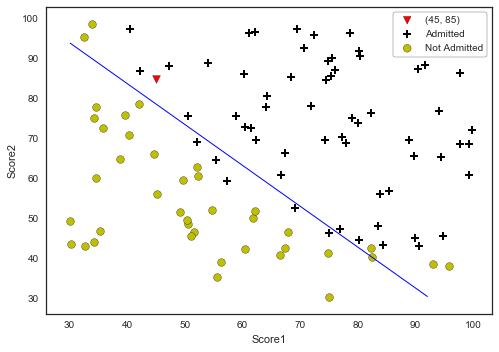

In [70]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
neg = data[:,2]==0
pos = data[:,2]==1
axes = plt.gca()
axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimizeCF.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

In [63]:
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

In [69]:
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(optimizeCF.x))
h

array([  2.77027020e-06,   3.71577984e-06,   4.98399592e-06, ...,
         9.99999611e-01,   9.99999710e-01,   9.99999784e-01])

In [60]:
data1 = loaddata('ex2data2.txt', delimeter=',')

Dimensions:  (118, 3)
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [104]:
y = np.c_[data1[:,2]]
X = np.c_[data1[:,:2]]

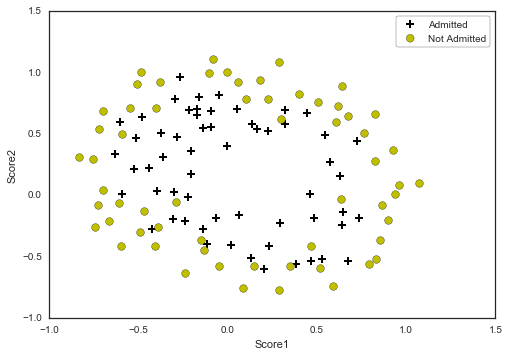

In [76]:
neg = data1[:,2]==0
pos = data1[:,2]==1
axes = plt.gca()
axes.scatter(data1[pos][:,0], data1[pos][:,1], marker='+', c='k', s=60, linewidth=2, label="Admitted")
axes.scatter(data1[neg][:,0], data1[neg][:,1], c='y', s=60, label="Not Admitted")
axes.set_xlabel("Score1")
axes.set_ylabel("Score2")
axes.legend(frameon= True, fancybox = True);

#### Regularized Cost Function
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### Vectorized Cost Function
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [156]:
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data1[:,0:2])
XX.shape

(118, 28)

In [252]:
def costFunctionReg(theta, reg,*args):
    m = y.size
    h = scipy.special.expit(XX.dot(theta))
    J = -1/m * (np.log(h).T.dot(y) + np.log(1-h.T).dot(1-y)) + reg/(2*m) * np.sum(np.square(theta[1:]))
    
    if(np.isnan(J[0])):
        return np.inf
    return J[0]

#### Partial derivative

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### Vectorized
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{Note: intercept parameter } \theta_{0} \text{ is not to be regularized}$$

In [262]:
def gradientReg(theta,reg,*args):
    m = y.size
    h = scipy.special.expit(XX.dot(theta.reshape(-1,1)))
    grad = 1/m * XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
    return grad.flatten()

In [253]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta,1)

0.69314718055994529

In [276]:
gradientReg(initial_theta,reg=1)

array([  8.47457627e-03,   1.87880932e-02,   7.77711864e-05,
         5.03446395e-02,   1.15013308e-02,   3.76648474e-02,
         1.83559872e-02,   7.32393391e-03,   8.19244468e-03,
         2.34764889e-02,   3.93486234e-02,   2.23923907e-03,
         1.28600503e-02,   3.09593720e-03,   3.93028171e-02,
         1.99707467e-02,   4.32983232e-03,   3.38643902e-03,
         5.83822078e-03,   4.47629067e-03,   3.10079849e-02,
         3.10312442e-02,   1.09740238e-03,   6.31570797e-03,
         4.08503006e-04,   7.26504316e-03,   1.37646175e-03,
         3.87936363e-02])

In [307]:
optimizeCF_reg = minimize(costFunctionReg,initial_theta, args=(0,XX,y), method=None, jac=gradientReg, options={'maxiter':3000})

accuracy = 100*sum(predict(XX,optimizeCF_reg.x) == y.ravel())/y.size    
accuracy

91.525423728813564

In [308]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

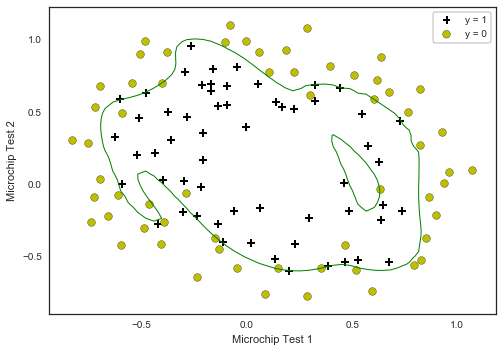

In [309]:
plotData(data1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(optimizeCF_reg.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       

In [301]:
optimizeCF_reg = minimize(costFunctionReg,initial_theta, args=(1,XX,y), method=None, jac=gradientReg, options={'maxiter':3000})

accuracy = 100*sum(predict(XX,optimizeCF_reg.x) == y.ravel())/y.size    
accuracy

83.050847457627114

In [302]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

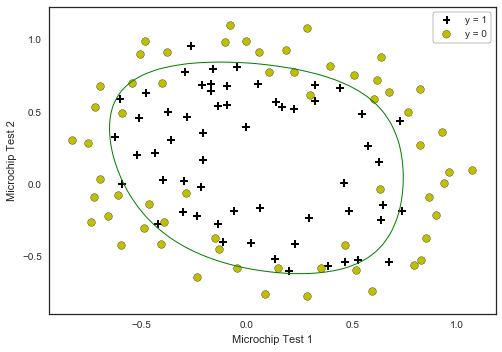

In [303]:
plotData(data1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(optimizeCF_reg.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       

In [310]:
optimizeCF_reg = minimize(costFunctionReg,initial_theta, args=(100,XX,y), method=None, jac=gradientReg, options={'maxiter':3000})

accuracy = 100*sum(predict(XX,optimizeCF_reg.x) == y.ravel())/y.size    
accuracy

61.016949152542374

In [311]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

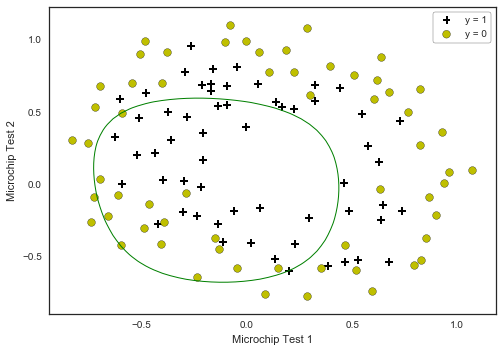

In [312]:
plotData(data1, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(optimizeCF_reg.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       